ML Bird Recognition

In [8]:
!pip install fastbook --quiet

In [9]:
from fastbook import *
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [12]:
urls = search_images_ddg('bird photos', max_images=1)
print(f"Downloaded URL: {urls[0]}")

dest = Path('bird.jpg')
if not dest.exists():
    download_url(urls[0], dest, show_progress=True)

Downloaded URL: https://birdfeederhub.com/wp-content/uploads/2019/05/bluebird-featured.jpg


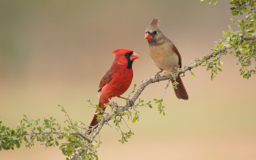

In [13]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [14]:
searches = ['forest', 'bird']
path = Path('bird_or_not')

if not path.exists():
    for label in searches:
        dest = path/label
        dest.mkdir(parents=True, exist_ok=True)
        results = search_images_ddg(f'{label} photo')
        download_images(dest, urls=results[:200])  # Download first 200 images per label
        resize_images(dest, max_size=400, dest=dest)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


(#24) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

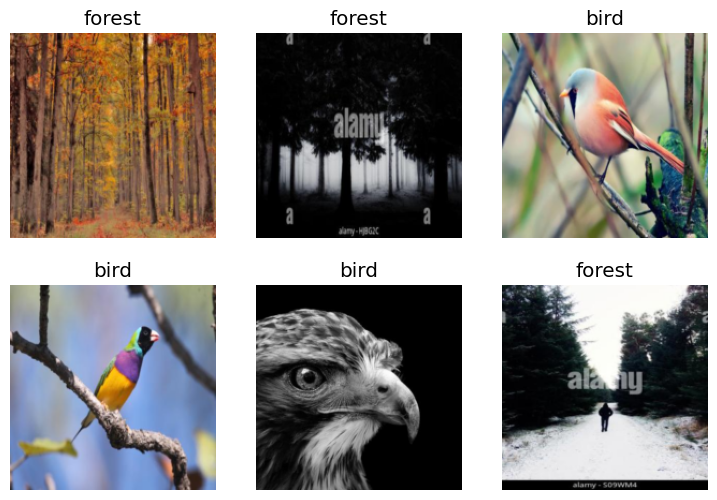

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 41.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.781682,1.064577,0.257143,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.166774,0.109309,0.028571,00:58
1,0.129425,0.086682,0.042857,00:59
2,0.091470,0.109422,0.042857,00:57


In [18]:
is_bird, _, probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a : {is_bird}.")
print(f"Probability it's a bird: {probs[1]:.6f}")

This is a : bird.
Probability it's a bird: 0.000044
